# ASSIGNMENT 1 - Classification
----------------
----------------

## A. Data Preprocessing
-----

### Imports and visualisation of the structure

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

main_df = pd.read_csv("Classification/ActualDataset/Heart-Disease-Prediction-Dataset.csv")

In [2]:
main_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
main_df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [4]:
main_df.shape

(4238, 16)

In [5]:
# Getting the ratio of ones to the total number of values in the dataset
main_df['TenYearCHD'].sum()/main_df.shape[0]

0.1519584709768759

In [6]:
main_df.shape

(4238, 16)

In [7]:
# Checking the number of nulls
main_df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

### Handling null values

In [8]:
# Get the median cigerattes smoked by a smoker
medcig = main_df.loc[main_df['cigsPerDay'] > 0].cigsPerDay.median()

# For smoker nans, use the median value
main_df.loc[(main_df['cigsPerDay'].isna()) & (main_df['currentSmoker'] == 1), 'cigsPerDay'] = medcig

# For non smoker nans, use 0
main_df.loc[(main_df['cigsPerDay'].isna()) & (main_df['currentSmoker'] == 0), 'cigsPerDay'] = 0

In [9]:
# Checking the number of nulls
main_df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<br>
<br>

In [10]:
# Replacing education with the median education
main_df.loc[main_df['education'].isna(), 'education'] = main_df['education'].median()
# Replacing cholestrol and BMI with their respective means
main_df.loc[main_df['BMI'].isna(), 'BMI'] = main_df['BMI'].mean()
main_df.loc[main_df['totChol'].isna(), 'totChol'] = main_df['totChol'].mean()

In [11]:
# Checking the number of nulls
main_df.isna().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<br>
<br>

In [12]:
# Records taking BP Medication
print(main_df[main_df['BPMeds'] == 1].shape)

# Records having prevalent Hypertension
print(main_df[main_df['prevalentHyp'] == 1].shape)

# Records taking BP Medication and have prevalent Hypertension
print(main_df[(main_df['BPMeds'] == 1) & (main_df['prevalentHyp'] == 1)].shape)

# Rough Probability that a record takes BPMeds if he/she has prevalentHyp
print(
    main_df[(main_df['BPMeds'] == 1) & (main_df['prevalentHyp'] == 1)].shape[0]
    / main_df[main_df['prevalentHyp'] == 1].shape[0]
)

(124, 16)
(1316, 16)
(124, 16)
0.09422492401215805


From the above values, we can note that:
1. Everyone who takes BPMeds has prevalent Hypertension
2. Everyone who has prevalent Hypertension may not take BPMeds
3. Probability that someone suffering with prevalent Hypertension takes BPMeds is about 0.0942

In [13]:
# Rough Probability that a record takes BPMeds if he/she has prevalentHyp
medtakers = (
    main_df[(main_df['BPMeds'] == 1) & (main_df['prevalentHyp'] == 1)].shape[0]
    / main_df[main_df['prevalentHyp'] == 1].shape[0]
)

# Generate a random array with this probability of 1s and assign it to nulls in BP Meds
m = main_df['BPMeds'].isna().sum()
np.random.RandomState(0)
s = np.random.choice([0, 1], p = [1-medtakers, medtakers], size = m)
main_df.loc[main_df['BPMeds'].isna(), 'BPMeds'] = s

In [14]:
# Checking the number of nulls
main_df.isna().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<br>
<br>

In [15]:
# Deleting all rows with nans for glucose and heartRate (gives a better answer)
main_df.drop(axis = "rows", labels = main_df.index[main_df['heartRate'].isna()], inplace = True)
main_df.drop(axis = "rows", labels = main_df.index[main_df['glucose'].isna()], inplace = True)

In [16]:
# Checking the number of nulls
main_df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### Checking correlation

In [17]:
main_df.loc[:, 'male':'glucose'].corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
male,1.000000,-0.027832,0.021283,0.204722,0.325445,-0.054787,-0.004112,-0.000305,0.014587,-0.071839,-0.046824,0.052563,0.075299,-0.115864,0.005974
age,-0.027832,1.000000,-0.161789,-0.212686,-0.190972,0.120203,0.064387,0.309426,0.109652,0.260034,0.391304,0.206087,0.135201,-0.006299,0.122139
education,0.021283,-0.161789,1.000000,0.024820,0.013391,-0.012081,-0.037501,-0.080064,-0.042134,-0.014005,-0.124269,-0.055862,-0.135753,-0.059086,-0.035199
currentSmoker,0.204722,-0.212686,0.024820,1.000000,0.774504,-0.048263,-0.038110,-0.107738,-0.049465,-0.048427,-0.135993,-0.113984,-0.161717,0.057394,-0.056935
cigsPerDay,0.325445,-0.190972,0.013391,0.774504,1.000000,-0.040429,-0.035247,-0.070581,-0.042600,-0.028973,-0.095110,-0.058003,-0.091714,0.070438,-0.057933
BPMeds,-0.054787,0.120203,-0.012081,-0.048263,-0.040429,1.000000,0.098199,0.250339,0.051185,0.085347,0.255781,0.190989,0.092990,0.010748,0.045892
prevalentStroke,-0.004112,0.064387,-0.037501,-0.038110,-0.035247,0.098199,1.000000,0.074755,0.006996,0.003755,0.063246,0.051473,0.029303,-0.022580,0.018439
prevalentHyp,-0.000305,0.309426,-0.080064,-0.107738,-0.070581,0.250339,0.074755,1.000000,0.083206,0.165188,0.699703,0.616968,0.301054,0.141659,0.086715
diabetes,0.014587,0.109652,-0.042134,-0.049465,-0.042600,0.051185,0.006996,0.083206,1.000000,0.043000,0.112558,0.052337,0.095719,0.059500,0.617657
totChol,-0.071839,0.260034,-0.014005,-0.048427,-0.028973,0.085347,0.003755,0.165188,0.043000,1.000000,0.213271,0.167060,0.113034,0.096082,0.046413


<AxesSubplot:>

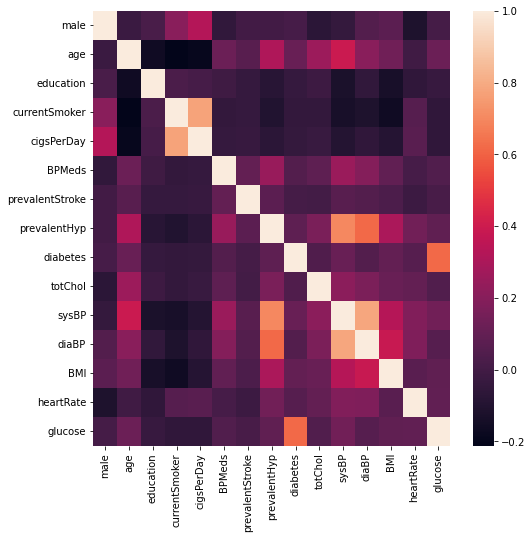

In [18]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(main_df.loc[:, 'male':'glucose'].corr())

* As expected, the columns cigsPerDay and current Smoker are highly correlated we can try removing the currentSmoker coumn as cigsPerDay naturally cover the fact that the person is a current Smoker or not.
* We have the diaBP and sysBP highly correlated. As per my research, the sysBP is more important from the perspective of Heart disease risk, we can try removing diaBP.

But as I have tried, removing these columns didn't increase the scores instead it decreased them a bit, I decided not to remove them.

In [19]:
# main_df.drop(axis='columns', labels=['diaBP', 'currentSmoker'], inplace = True)

These highly correlated columns like sysBP and diaBP can be modelled better using a multivariate gaussian bayes classifier rather than a gaussian naive bayes classifier. This is because in naive bayes we assume the columns to be independent and we don't capture the correlation between the columns. 

<br>
<br>

### Splitting into training and test set

In [20]:
def normalize(X):
    for i in range(0, X.shape[1]):
        X[:, i] = (X[:, i]-np.mean(X[:, i]))/np.std(X[:, i])
            
from sklearn.model_selection import train_test_split

# This function splits converts the required columns of a dataframe to X and y to numpy arrays
# Then it normalizes them
# The it splits them into train and test set
def dosplit(df, fcols, targetcol):
    X = main_df.loc[:, fcols].to_numpy().astype(np.float64)
    y = main_df[targetcol].to_numpy().astype(np.float64)
    normalize(X)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20, random_state=5)
    return (X_train, X_test, y_train, y_test)

targ = "TenYearCHD"
allcomb = []
for cl in main_df.columns:
    if(cl != targ):
        allcomb.append(cl)
specComb = ['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'sysBP', 'glucose']

### Duplicating rows for the imbalance

In [21]:
def duprows(X_train, y_train, dupar=2.75):
    
    # The count of the number of ones in the training set
    con = (abs(y_train-1)<1e-5).sum()
    extrarows = int((dupar-1) * con)

    Xdup = np.zeros((extrarows, X_train.shape[1]))
    ydup = np.zeros(extrarows)

    l = 0
    i = 0
    while(l < extrarows):
        if(abs(y_train[i]-1) <1e-5):
            ydup[l] = 1
            Xdup[l] = X_train[i, :]
            l+=1
        i=(i+1)%len(y_train)
    
    return (np.append(X_train, Xdup, axis=0), np.append(y_train, ydup, axis=0))


### Defining the functions for the metrics used

In [22]:
def accuracy(y_true, y_pred):
    return (y_true == y_pred).sum()/len(y_true)

In [23]:
def recall(y_test, yhat_test):
    rec = ((2*y_test + 1*yhat_test)==3).sum();
    if(rec != 0):
        rec /= ((2*y_test + 1*yhat_test)==3).sum() + ((2*y_test + 1*yhat_test)==2).sum()
    return rec

In [24]:
def precision(y_test, yhat_test):
    prec = ((2*y_test + 1*yhat_test)==3).sum();
    if(prec != 0):
        prec /= ((2*y_test + 1*yhat_test)==3).sum() + ((2*y_test + 1*yhat_test)==1).sum()
    return prec

In [25]:
def f1score(y_test, yhat_test):
    r = recall(y_test, yhat_test)
    p = precision(y_test, yhat_test)
    
    if(r == 0 or p == 0):
        return 0

    return 2/(1/r + 1/p)

In [26]:
def evaluate(y_test, yhat_test):
    print("Accuracy :", accuracy(y_test, yhat_test))
    print("Recall :", recall(y_test, yhat_test))
    print("Precision :", precision(y_test, yhat_test))
    print("F1 Score :", f1score(y_test, yhat_test))

## A. Logistic Regression Using Gradient Descent

-----

In [27]:
def accuracy(y_true, y_pred):
    return (y_true == y_pred).sum()/len(y_true)


class GradientDescentLogR:

    def __init__(self, learning_rate=0.0001, n_iters=1000, plot=True):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.plot = plot
        
    def sigmoid(self, x):
        y = 1/(1+np.exp(-x))
        return y
    

    def getCost(self, X, y):
        ht = self.sigmoid(X @ self.weights)
        eps = 1e-5
        cost = (1/X.shape[0]) * (-y*np.log(ht + eps) - (1-y)*np.log(1 - ht + eps)).sum()
        return cost
    
    
    def fit(self, X, y):
        
        # Adding a column of ones to the features
        Xd = np.c_[np.ones(X.shape[0]), X]
        n_samples = Xd.shape[0] 
                
        self.weights = np.random.uniform(low=-0.01, high=0.01, size=Xd.shape[1])
        
        costs = []
        for _ in range(self.n_iters):
            y_predicted = self.sigmoid(np.dot(Xd, self.weights))
            change = np.dot(Xd.T, y_predicted-y)
            self.weights -= self.lr*change
            
            if(self.plot):
                costs.append(self.getCost(Xd, y))

        if(self.plot):
            plt.plot(costs)

        
    def predict(self, X):
        
        Xd = np.c_[np.ones(X.shape[0]), X]
        y_approximated = np.round(self.sigmoid(np.dot(Xd, self.weights)))
        
        return y_approximated

### Fitting the model for different Cases

#### 1. All columns

Accuracy : 0.8116883116883117
Recall : 0.3969465648854962
Precision : 0.4406779661016949
F1 Score : 0.4176706827309237


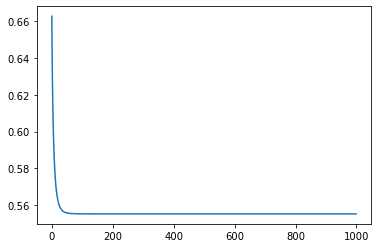

In [28]:
X_train,X_test,y_train,y_test = dosplit(main_df, allcomb, targ)
X_train,y_train = duprows(X_train, y_train, dupar=2.75)

lreg = GradientDescentLogR(n_iters=1000)
lreg.fit(X_train, y_train)

yhat_test = lreg.predict(X_test)
evaluate(y_test, yhat_test)

#### 2. Special Columns individually

In [29]:
for col in specComb:
    print("For", col, ':')
    X_train,X_test,y_train,y_test = dosplit(main_df, [col], targ)
    X_train,y_train = duprows(X_train, y_train, dupar=2.75)

    lreg = GradientDescentLogR(n_iters=1000, plot=False)
    lreg.fit(X_train, y_train)
    
    yhat_test = lreg.predict(X_test)
    evaluate(y_test, yhat_test)
    print("")

For age :
Accuracy : 0.7896103896103897
Recall : 0.21374045801526717
Precision : 0.3218390804597701
F1 Score : 0.2568807339449541

For cigsPerDay :
Accuracy : 0.8298701298701299
Recall : 0
Precision : 0
F1 Score : 0

For totChol :
Accuracy : 0.8298701298701299
Recall : 0.022900763358778626
Precision : 0.5
F1 Score : 0.043795620437956206

For BMI :
Accuracy : 0.8298701298701299
Recall : 0.007633587786259542
Precision : 0.5
F1 Score : 0.015037593984962405

For heartRate :
Accuracy : 0.8298701298701299
Recall : 0
Precision : 0
F1 Score : 0

For sysBP :
Accuracy : 0.8103896103896104
Recall : 0.17557251908396945
Precision : 0.3770491803278688
F1 Score : 0.2395833333333333

For glucose :
Accuracy : 0.8324675324675325
Recall : 0.05343511450381679
Precision : 0.5833333333333334
F1 Score : 0.09790209790209789



#### 3. Special Columns Together

i.e. the combination of age, cigsPerDay, totChol, BMI, heartRate, sysBP and glucose

Accuracy : 0.8194805194805195
Recall : 0.3511450381679389
Precision : 0.46
F1 Score : 0.3982683982683982


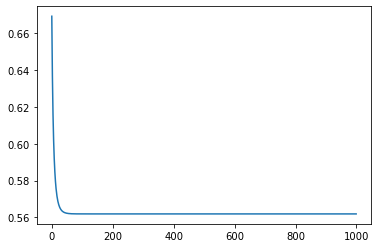

In [30]:
X_train,X_test,y_train,y_test = dosplit(main_df, specComb, targ)
X_train,y_train = duprows(X_train, y_train, dupar=2.75)

lreg = GradientDescentLogR(n_iters=1000)
lreg.fit(X_train, y_train)

yhat_test = lreg.predict(X_test)
evaluate(y_test, yhat_test)

## B. Logistic Regression Using Newton's method in Gradient Descent

-----

In [31]:
def accuracy(y_true, y_pred):
    return (y_true == y_pred).sum()/len(y_true)


class NewtonLogR:

    def __init__(self, learning_rate=0.003, n_iters=1000, plot=True):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.plot = plot
        
    def sigmoid(self, x):
        y = 1/(1+np.exp(-x))
        return y
    

    def getCost(self, X, y):
        ht = self.sigmoid(X @ self.weights)
        eps = 1e-5
        cost = (1/X.shape[0]) * (-y*np.log(ht + eps) - (1-y)*np.log(1 - ht + eps)).sum()
        return cost
    
    
    def fit(self, X, y):
        
        # Adding a column of ones to the features
        Xd = np.c_[np.ones(X.shape[0]), X]
        n_samples = Xd.shape[0] 
        self.weights = np.random.uniform(low=-0.01, high=0.01, size=Xd.shape[1])
        
        evec = self.sigmoid(-Xd @ self.weights) * self.sigmoid(Xd @ self.weights) 
        n = int(Xd.shape[1])        
        D = np.diag(evec)
        H = Xd.T @ D @ Xd
        for i in range(n):
            for j in range(n):
                H[i, j] = (evec * Xd[:, i] * Xd[:, j]).sum()
        
        Hinv = np.linalg.pinv(H);
        
        costs = []
        for _ in range(self.n_iters):
            y_predicted = self.sigmoid(np.dot(Xd, self.weights))
            change = np.dot(Xd.T, y_predicted-y)
            self.weights -= Hinv@change

            if(self.plot):
                costs.append(self.getCost(Xd, y))

        if(self.plot):
            plt.plot(costs)

        
    def predict(self, X):
        
        Xd = np.c_[np.ones(X.shape[0]), X]
        y_approximated = np.round(self.sigmoid(np.dot(Xd, self.weights)))
        
        return y_approximated

### Fitting the model for different Cases

#### 1. All columns

Accuracy : 0.8116883116883117
Recall : 0.3969465648854962
Precision : 0.4406779661016949
F1 Score : 0.4176706827309237


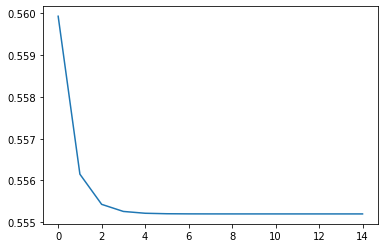

In [32]:
X_train,X_test,y_train,y_test = dosplit(main_df, allcomb, targ)
X_train,y_train = duprows(X_train, y_train, dupar=2.75)

lreg = NewtonLogR(n_iters=15)
lreg.fit(X_train, y_train)

yhat_test = lreg.predict(X_test)
evaluate(y_test, yhat_test)

#### 2. Special Columns individually

In [33]:
for col in specComb:
    print("For", col, ':')
    X_train,X_test,y_train,y_test = dosplit(main_df, [col], targ)
    X_train,y_train = duprows(X_train, y_train, dupar=2.75)

    lreg = NewtonLogR(n_iters=15, plot=False)
    lreg.fit(X_train, y_train)
    
    yhat_test = lreg.predict(X_test)
    evaluate(y_test, yhat_test)
    print("")

For age :
Accuracy : 0.7896103896103897
Recall : 0.21374045801526717
Precision : 0.3218390804597701
F1 Score : 0.2568807339449541

For cigsPerDay :
Accuracy : 0.8298701298701299
Recall : 0
Precision : 0
F1 Score : 0

For totChol :
Accuracy : 0.8298701298701299
Recall : 0.022900763358778626
Precision : 0.5
F1 Score : 0.043795620437956206

For BMI :
Accuracy : 0.8298701298701299
Recall : 0.007633587786259542
Precision : 0.5
F1 Score : 0.015037593984962405

For heartRate :
Accuracy : 0.8298701298701299
Recall : 0
Precision : 0
F1 Score : 0

For sysBP :
Accuracy : 0.8103896103896104
Recall : 0.17557251908396945
Precision : 0.3770491803278688
F1 Score : 0.2395833333333333

For glucose :
Accuracy : 0.8324675324675325
Recall : 0.05343511450381679
Precision : 0.5833333333333334
F1 Score : 0.09790209790209789



#### 3. Special Columns Together

i.e. the combination of age, cigsPerDay, totChol, BMI, heartRate, sysBP and glucose

Accuracy : 0.8194805194805195
Recall : 0.3511450381679389
Precision : 0.46
F1 Score : 0.3982683982683982


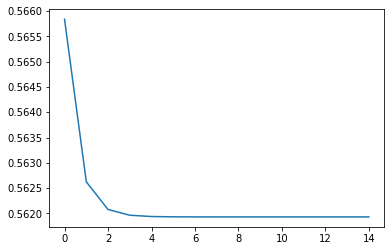

In [34]:
X_train,X_test,y_train,y_test = dosplit(main_df, specComb, targ)
X_train,y_train = duprows(X_train, y_train, dupar=2.75)

lreg = NewtonLogR(n_iters=15)
lreg.fit(X_train, y_train)

yhat_test = lreg.predict(X_test)
evaluate(y_test, yhat_test)

## C. Naive Bayes Classifier

-----

In [35]:
def accuracy(y_true, y_pred):
    return (y_true == y_pred).sum()/len(y_true)


# Returns an array of means corresponding to each column/feature
def getClassMeans(X, y, cls):
     return X[y==cls].mean(axis=0)    


# Returns an array of variances corresponding to each column/feature 
def getClassVar(X, y, cls):
    return X[y==cls].var(axis=0)


class NaiveBayes:

    def __init__(self, classes=[0,1]):
        self.classes = classes # Stores the different class labels
        self.clasmean = None # Stores mean array for each label
        self.classvar = None # Stores variance array for each label
        self.labelP = None # Stores the probability of occurence of a label without any condition
    
    # Sets the mean and variance arrays for the given data
    def setmv(self, X, y):
        self.classmean = {}
        self.classvar = {}
        for cl in self.classes:
            self.classmean[cl] = getClassMeans(X, y, cl)
            self.classvar[cl] = getClassVar(X, y, cl)   
            
    # Sets the label probablilities
    def setPrior(self, y):
        self.labelP = {}
        for cls in self.classes:
            self.labelP[cls] = (y==cls).sum()/len(y)
        
    # computing the model parameters
    def fit(self, X, y):
        self.setmv(X, y)
        self.setPrior(y)
       
    # Gives the Probability density array(probability density for every feature) for an x wrt a given class
    def gaussianProbD(self, cls, x):
        mean = self.classmean[cls]
        var = self.classvar[cls]
        num = np.exp(-((x-mean)**2 / (2*var)))
        den = np.sqrt(2 * np.pi * var)
        return num/den
        
    # Gives the best class for an x (predicting for just one x)
    def bestClass(self, x):
        bestcl = 0
        bsc = 0
        for cl in self.classes:
            gp = self.gaussianProbD(cl, x)
            sc = self.labelP[cl]
            sc *= np.prod(gp)
            
            if(sc > bsc):
                bestcl = cl
                bsc = sc
                
        return bestcl
    
    # predicting a set of values
    def predict(self, X):
        yh = np.zeros(X.shape[0])
        
        for i in range(X.shape[0]):
            yh[i] = self.bestClass(X[i, :])
            
        return yh

### Fitting the model for different Cases

#### 1. All columns

In [36]:
X_train,X_test,y_train,y_test = dosplit(main_df, allcomb, targ)
X_train,y_train = duprows(X_train, y_train, dupar=2.75)

mod = NaiveBayes()
mod.fit(X_train, y_train)

yhat_test = mod.predict(X_test)
evaluate(y_test, yhat_test)

Accuracy : 0.7935064935064935
Recall : 0.25190839694656486
Precision : 0.35106382978723405
F1 Score : 0.29333333333333333


#### 2. Special Columns individually

In [37]:
for col in specComb:
    print("For", col, ':')
    X_train,X_test,y_train,y_test = dosplit(main_df, [col], targ)
    X_train,y_train = duprows(X_train, y_train, dupar=2.75)

    mod = NaiveBayes()
    mod.fit(X_train, y_train)
    
    yhat_test = mod.predict(X_test)
    evaluate(y_test, yhat_test)
    print("")

For age :
Accuracy : 0.7766233766233767
Recall : 0.24427480916030533
Precision : 0.3047619047619048
F1 Score : 0.2711864406779661

For cigsPerDay :
Accuracy : 0.8155844155844156
Recall : 0.07633587786259542
Precision : 0.3225806451612903
F1 Score : 0.1234567901234568

For totChol :
Accuracy : 0.8116883116883117
Recall : 0.04580152671755725
Precision : 0.23076923076923078
F1 Score : 0.07643312101910829

For BMI :
Accuracy : 0.8051948051948052
Recall : 0.04580152671755725
Precision : 0.1935483870967742
F1 Score : 0.07407407407407407

For heartRate :
Accuracy : 0.8298701298701299
Recall : 0
Precision : 0
F1 Score : 0

For sysBP :
Accuracy : 0.8
Recall : 0.22137404580152673
Precision : 0.35802469135802467
F1 Score : 0.27358490566037735

For glucose :
Accuracy : 0.8246753246753247
Recall : 0.07633587786259542
Precision : 0.4166666666666667
F1 Score : 0.12903225806451613



#### 3. Special Columns Together

i.e. the combination of age, cigsPerDay, totChol, BMI, heartRate, sysBP and glucose

In [38]:
X_train,X_test,y_train,y_test = dosplit(main_df, specComb, targ)
X_train,y_train = duprows(X_train, y_train, dupar=2.75)

mod = NaiveBayes()
mod.fit(X_train, y_train)

yhat_test = lreg.predict(X_test)
evaluate(y_test, yhat_test)

Accuracy : 0.8194805194805195
Recall : 0.3511450381679389
Precision : 0.46
F1 Score : 0.3982683982683982


## D. Naive Bayes Classifier using SKLearn*

-----

\* This was not required but done for assessment of the implemented models

In [39]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

X_train,X_test,y_train,y_test = dosplit(main_df, allcomb, targ)
X_train,y_train = duprows(X_train, y_train, dupar=2.75)
model = GaussianNB()
model.fit(X_train,y_train)

yhat_test = model.predict(X_test)
evaluate(y_test, yhat_test)

Accuracy : 0.7935064935064935
Recall : 0.25190839694656486
Precision : 0.35106382978723405
F1 Score : 0.29333333333333333


## E. SKLearn Logistic Regression*

-----

\* This was not required but done for assessment of the implemented models

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [41]:
X_train,X_test,y_train,y_test = dosplit(main_df, allcomb, targ)
X_train,y_train = duprows(X_train, y_train, dupar=2.75)

lreg = LogisticRegression(solver='lbfgs', max_iter=4000)
lreg.fit(X_train, y_train)
yhat_test = lreg.predict(X_test)
evaluate(y_test, yhat_test)

Accuracy : 0.8116883116883117
Recall : 0.3969465648854962
Precision : 0.4406779661016949
F1 Score : 0.4176706827309237
